In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

df_exp = pd.read_csv(r"C:\Users\coys7\Apartments_prices\final_22")

df_exp['District'].value_counts()

Бостандыкский р-н    3070
Ауэзовский р-н       2442
Наурызбайский р-н    2082
Алмалинский р-н      1854
Алатауский р-н       1634
Турксибский р-н      1186
Медеуский р-н        1155
Жетысуский р-н        983
Name: District, dtype: int64

35000000     408
30000000     350
45000000     313
40000000     292
25000000     287
            ... 
10990000       1
194999999      1
23000500       1
51990000       1
13100000       1
Name: prices, Length: 1152, dtype: int64

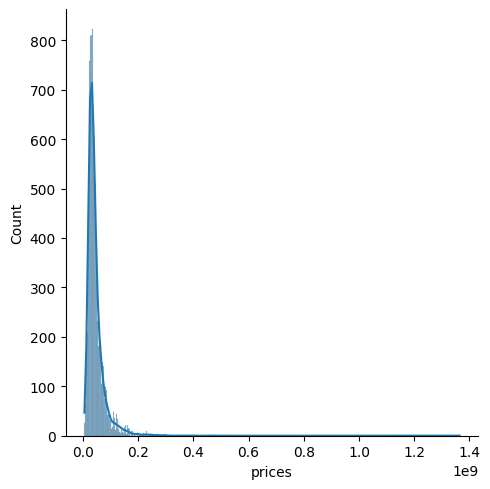

In [62]:
sns.displot(df_exp['prices'], kde=True)
df_exp['prices'].value_counts()

In [63]:
all_dummies = pd.get_dummies(df_exp['District'])
all_dummies_Type = pd.get_dummies(df_exp['Type'])
df_exp_merged=df_exp.join(all_dummies)
df_exp_merged=df_exp_merged.join(all_dummies_Type)
df_exp_merged


,address,prices,Rooms,Square_in_m^2,Floor,Type,Year,District,Type_code,District_code,...,Алмалинский р-н,Ауэзовский р-н,Бостандыкский р-н,Жетысуский р-н,Медеуский р-н,Наурызбайский р-н,Турксибский р-н,кирпичный дом,монолитный дом,панельный дом
0,Аль-Фараби,70000000,3,91.8,8,монолитный дом,1990,Бостандыкский р-н,1,3,...,0,0,1,0,0,0,0,0,1,0
1,Шевченко 154 — Муканова,97000000,3,129.0,7,монолитный дом,2008,Алмалинский р-н,1,1,...,1,0,0,0,0,0,0,0,1,0
2,мкр Рахат 6/1 — Байжанов,7700000,1,32.1,1,кирпичный дом,1979,Алатауский р-н,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Бузурбаева 17 — Ниже Гоголя,44000000,2,67.0,4,кирпичный дом,1968,Медеуский р-н,0,5,...,0,0,0,0,1,0,0,1,0,0
4,"мкр 13-й военный городок, Суюнбая 292/1 — 16 ...",37500000,3,90.0,2,кирпичный дом,1974,Турксибский р-н,0,7,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14401,Назарбаева 223 — Назарбаева Ганди,285000000,5,168.0,5,монолитный дом,2013,Медеуский р-н,1,5,...,0,0,0,0,1,0,0,0,1,0
14402,Брусиловского 163,90000000,3,118.0,12,монолитный дом,2011,Алмалинский р-н,1,1,...,1,0,0,0,0,0,0,0,1,0
14403,Назарбаева 274 — Хаджимукана,55500000,3,63.0,1,кирпичный дом,1966,Медеуский р-н,0,5,...,0,0,0,0,1,0,0,1,0,0
14404,Байкенова 7 — Вверх по Асанбай Аскарова,46400000,2,58.0,4,кирпичный дом,2018,Бостандыкский р-н,0,3,...,0,0,1,0,0,0,0,1,0,0


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

y = df_exp_merged.prices

features = ['Rooms','Square_in_m^2','Floor', 'Year', 'Бостандыкский р-н','Ауэзовский р-н','Наурызбайский р-н','Алмалинский р-н',
            'Алатауский р-н','Турксибский р-н','Медеуский р-н','Жетысуский р-н', 'кирпичный дом', 'монолитный дом','панельный дом']
x=df_exp_merged[features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)


rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_x, train_y)
rf_prediction = rf_model.predict(val_x)

rf_val_mae = mean_absolute_error (rf_prediction, val_y)

print("MAE of Random Forest Regressor on test set: {:.3f}".format(rf_val_mae))

MAE of Random Forest Regressor on test set: 7211811.197


In [65]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(rf_prediction, val_y)
print("MSE Random Forest Regressor: {:.3f}".format(MSE))

RMSE = mean_squared_error(rf_prediction, val_y, squared=False)
print ("RMSE Random Forest Regressor: {:.3f}".format(RMSE))

MSE Random Forest Regressor: 507960599943074.250
RMSE Random Forest Regressor: 22537981.275


In [66]:
from sklearn.metrics import mean_squared_log_error
MSLE_rf = mean_squared_log_error(rf_prediction, val_y)
print("MSLE Random Forest Regressor: {:.4%}".format(MSLE_rf))

MSLE Random Forest Regressor: 3.5320%


In [67]:
# train_x.dtypes
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
xgb_prediction = xgb.predict(val_x)
xgb_val_mae = mean_absolute_error(xgb_prediction, val_y)
print("MAE XGBoost: {:.3f}".format(xgb_val_mae))
MSLE_xgb = mean_squared_log_error(xgb_prediction, val_y)
print("MSLE XGBoost: {:.4%}".format(MSLE_xgb))

MAE XGBoost: 7115553.074
MSLE XGBoost: 3.4203%


In [68]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)
gnb_prediction = gnb.predict(val_x)
gnb_prediction_float = np.array(gnb_prediction, dtype=float)

gnb_val_mae = mean_absolute_error(gnb_prediction_float, val_y)
print("MAE Gaussian Naive Bayes: {:.3f}".format(gnb_val_mae))

MAE Gaussian Naive Bayes: 14653681.621


In [69]:
lr =LogisticRegression(max_iter = 1000)
lr.fit(train_x, train_y)
lr_prediction = lr.predict(val_x)
lr_prediction_float = np.array(lr_prediction, dtype=float)

lr_val_mae = mean_absolute_error(lr_prediction_float, val_y)
print("MAE Logistic Regression: {:.3f}".format(lr_val_mae))

MAE Logistic Regression: 11033433.130


c:\Users\coys7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(train_x,train_y)
dt_prediction = dt.predict(val_x)

dt_val_mae = mean_absolute_error(dt_prediction,val_y)
print("MAE Decision Tree Classifier: {:.3f}".format(dt_val_mae))

MAE Decision Tree Classifier: 9589204.787


In [71]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_prediction = knn.predict(val_x)

knn_val_mae = mean_absolute_error(knn_prediction, val_y)
print("MAE K-nearest Neighbors: {:.3f}".format(knn_val_mae))

MAE K-nearest Neighbors: 12807008.408


In [72]:
svc = SVC (probability=True)
svc.fit(train_x,train_y)
svc_prediction = svc.predict(val_x)
svc_prediction_float = np.array(svc_prediction, dtype=float)

svc_val_mae = mean_absolute_error(svc_prediction,val_y)
print("MAE Support Vector Classification: {:.3f}".format(svc_val_mae))

MAE Support Vector Classification: 20282047.914


In [73]:
models = ["Random Forest Regressor", "XGBoost", "Gaussian Naive Bayes", "Logistic Regression", "Decision Tree Regressor", "K-nearest Neighbors", "Support Vector"]
tests_mae =[rf_val_mae, xgb_val_mae, gnb_val_mae, lr_val_mae, dt_val_mae, knn_val_mae, svc_val_mae]
compare_models = pd.DataFrame({"Algorithms": models, "MAE": tests_mae})
compare_models.sort_values(by = "MAE", ascending=True)

,Algorithms,MAE
1,XGBoost,7.115553e+06
0,Random Forest Regressor,7.211811e+06
4,Decision Tree Regressor,9.589205e+06
3,Logistic Regression,1.103343e+07
5,K-nearest Neighbors,1.280701e+07
2,Gaussian Naive Bayes,1.465368e+07
6,Support Vector,2.028205e+07


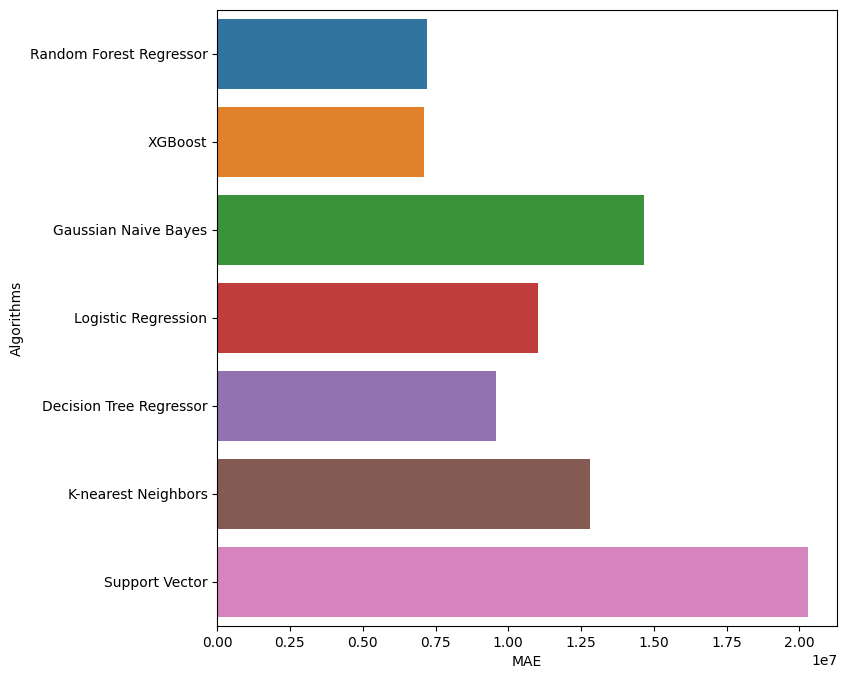

In [74]:
import matplotlib.pyplot as plt
plt.figure (figsize =(8,8))
sns.barplot(x = "MAE", y = "Algorithms", data = compare_models)
plt.show()

In [75]:
from sklearn.metrics import r2_score
score = r2_score(rf_prediction, val_y)
print (score)


0.5246961414148033


In [76]:
val_y1=val_y.copy()
gross =[]
for i in rf_prediction:
    gross.append(i)
df=pd.DataFrame(data=gross)
df = df.set_index(val_y.index)
df.rename(columns={0: "predicted"}, inplace=True)
df1=pd.concat([val_y1, df], axis=1)
df1.columns = ["true", "predicted"]
df1.head()

,true,predicted
7587,65000000,5.424400e+07
3683,33500000,3.870200e+07
9331,55700000,5.047389e+07
10539,18000000,2.159983e+07
6461,59000000,6.234000e+07


In [77]:
df1['diff'] = df1['predicted'] - df1['true']
pd.DataFrame({'Count':[(df1['diff']<0).sum(),(df1['diff']==0).sum(),(df1['diff']>0).sum()]},columns=["Count"], index = ['Underestimation', 'Exact Estimation', 'Overestimation'])


,Count
Underestimation,1694
Exact Estimation,0
Overestimation,1908


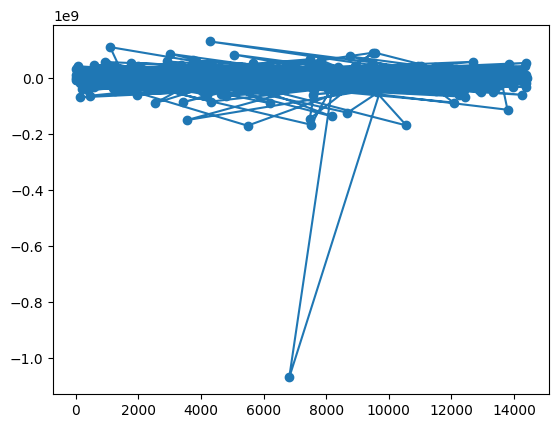

In [78]:
plt.plot('diff', data=df1, linestyle='-', marker='o')
plt.show()

In [79]:
df1.sort_values(by = "diff", ascending=True)

,true,predicted,diff
6820,1365000000,2.970716e+08,-1.067928e+09
5488,350000000,1.796436e+08,-1.703564e+08
10560,480000000,3.104022e+08,-1.695978e+08
7523,460000000,2.929148e+08,-1.670852e+08
3558,365920000,2.155510e+08,-1.503690e+08
...,...,...,...
3025,220000000,3.055832e+08,8.558320e+07
9487,77000000,1.666764e+08,8.967645e+07
9562,83000000,1.727208e+08,8.972080e+07
1101,107073249,2.167505e+08,1.096773e+08


<Axes: xlabel='diff', ylabel='true'>

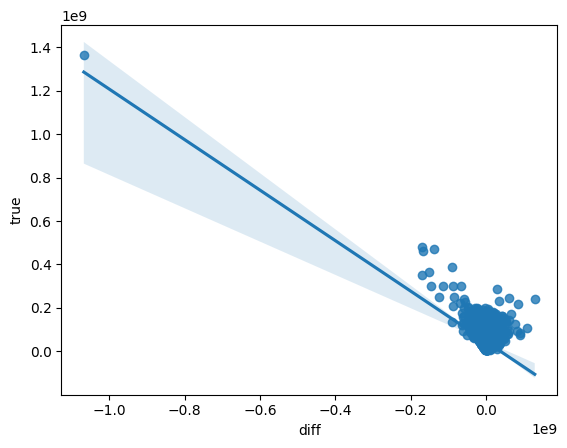

In [80]:
sns.regplot(x=df1['diff'], y=df1['true'])

In [81]:
df_merged=val_x.join(df1)
df_merged

,Rooms,Square_in_m^2,Floor,Year,Бостандыкский р-н,Ауэзовский р-н,Наурызбайский р-н,Алмалинский р-н,Алатауский р-н,Турксибский р-н,Медеуский р-н,Жетысуский р-н,кирпичный дом,монолитный дом,панельный дом,true,predicted,diff
7587,4,75.0,4,1978,1,0,0,0,0,0,0,0,0,0,1,65000000,5.424400e+07,-1.075600e+07
3683,3,59.0,4,1969,0,0,0,1,0,0,0,0,0,0,1,33500000,3.870200e+07,5.202000e+06
9331,3,75.0,13,2012,0,0,0,1,0,0,0,0,0,1,0,55700000,5.047389e+07,-5.226111e+06
10539,1,34.5,5,2023,0,0,1,0,0,0,0,0,0,1,0,18000000,2.159983e+07,3.599829e+06
6461,2,78.9,7,2023,0,1,0,0,0,0,0,0,0,1,0,59000000,6.234000e+07,3.340000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,2,44.0,3,1975,0,0,0,0,0,0,1,0,0,0,1,38000000,3.374667e+07,-4.253333e+06
8187,2,45.0,1,1968,0,0,0,0,0,1,0,0,1,0,0,27000000,2.478660e+07,-2.213400e+06
10279,2,84.0,8,2014,1,0,0,0,0,0,0,0,0,1,0,101000000,8.459500e+07,-1.640500e+07
5915,2,48.4,12,2023,1,0,0,0,0,0,0,0,0,1,0,35500000,3.929400e+07,3.794000e+06


<Axes: xlabel='diff', ylabel='Square_in_m^2'>

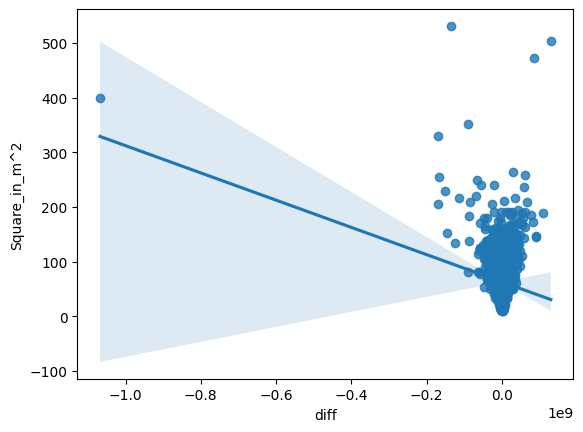

In [82]:
sns.regplot(x=df_merged['diff'], y=df_merged['Square_in_m^2'])